# Fashion MNIST를 사용한 CNN 모델 구현 및 비교

이번에는 Fashion MNIST 데이터셋을 사용하여 의류 이미지 분류 모델을 구현해보겠습니다.

먼저 TensorFlow와 Keras를 사용하여 모델을 구축하고, 이후에 PyTorch를 사용하여 동일한 작업을 수행한 뒤 결과를 비교해보겠습니다.

## 1. Fashion MNIST 데이터셋 소개

- Fashion MNIST는 10개의 의류 종류를 포함한 흑백 이미지 데이터셋입니다.
- 각 이미지는 28x28 픽셀 크기를 가지며, 총 70,000개의 샘플로 구성되어 있습니다.

    - 훈련 세트: 60,000개
    - 테스트 세트: 10,000개

- MNIST 데이터셋의 대체제로, 더 복잡한 이미지 분류를 연습하기에 적합합니다.

<img src="https://www.tensorflow.org/tutorials/keras/classification_files/output_oZTImqg_CaW1_0.png?hl=ko" width="500">

## 2. TensorFlow와 Keras를 사용한 모델 구현

### 필요한 라이브러리 import


In [ ]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input, BatchNormalization


- numpy: 수치 계산을 위한 라이브러리입니다.
- matplotlib.pyplot: 데이터 시각화를 위한 라이브러리입니다.
- tensorflow.keras: TensorFlow에서 제공하는 고수준의 신경망 API입니다.
- ImageDataGenerator: 이미지 데이터 증강을 위한 클래스입니다.

### 데이터 로드 및 전처리

In [ ]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = load_data()

# 데이터 차원 확장 (채널 차원 추가)
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# 데이터 정규화 (0~1 범위로 스케일링)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 데이터 형태 확인
print("훈련 데이터 셋:", x_train.shape, y_train.shape)
print("테스트 데이터 셋:", x_test.shape, y_test.shape)

# 클래스 이름 정의
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
훈련 데이터 셋: (60000, 28, 28, 1) (60000,)
테스트 데이터 셋: (10000, 28, 28, 1) (10000,)


### 데이터 시각화


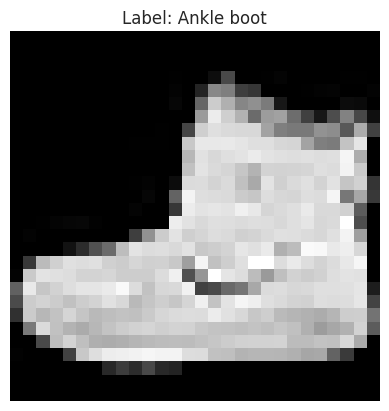

In [ ]:
# 첫 번째 훈련 이미지 시각화
plt.figure()
plt.imshow(x_train[0].reshape(28, 28), cmap='gray')
plt.title(f'Label: {class_names[y_train[0]]}')
plt.axis('off')
plt.show()


### 2.1 간단한 모델 구성 및 학습


In [ ]:
# 모델 정의
def build_model():
    input = Input(shape=(28, 28, 1))
    x = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(input)
    x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
    x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input, outputs=output)

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model_1 = build_model()
model_1.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 22, 22, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,029,706 (15.37 MB)

 Trainable params: 4,029,706 (15.37 MB)

 Non-trainable params: 0 (0.00 B)

### 모델 학습


In [ ]:
hist_1 = model_1.fit(x_train, y_train,
                     epochs=20,
                     validation_split=0.3,
                     batch_size=128)


Epoch 1/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.7555 - loss: 0.7064 - val_accuracy: 0.8815 - val_loss: 0.3314
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8916 - loss: 0.3011 - val_accuracy: 0.9036 - val_loss: 0.2689
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9127 - loss: 0.2324 - val_accuracy: 0.9052 - val_loss: 0.2699
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9351 - loss: 0.1767 - val_accuracy: 0.9161 - val_loss: 0.2461
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9527 - loss: 0.1273 - val_accuracy: 0.9083 - val_loss: 0.2686
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9662 - loss: 0.0930 - val_accuracy: 0.9194 - val_loss: 0.2660
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9738 - loss: 0.0693 - val_accuracy: 0.9118 - val_loss: 0.3117
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9804 - loss: 0.0565 - val_accuracy: 

### 학습 결과 시각화

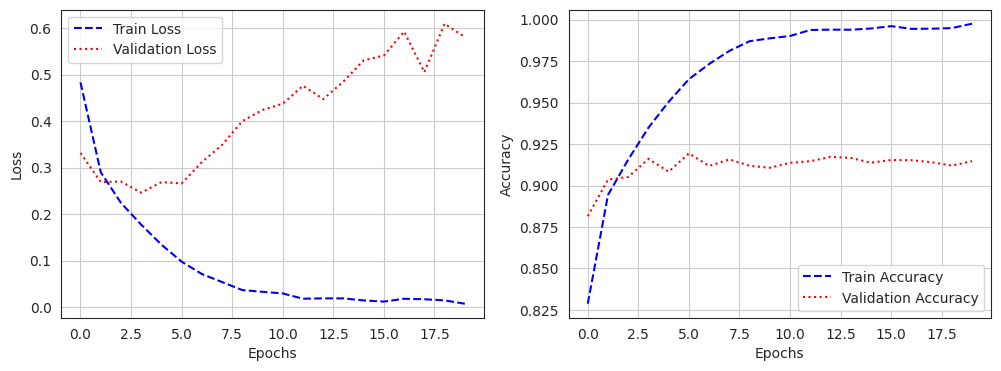

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_1.history['loss'], 'b--', label='Train Loss')
plt.plot(hist_1.history['val_loss'], 'r:', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(hist_1.history['accuracy'], 'b--', label='Train Accuracy')
plt.plot(hist_1.history['val_accuracy'], 'r:', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()


### 모델 평가

In [ ]:
test_loss, test_acc = model_1.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9095 - loss: 0.6238
테스트 정확도: 91.28%


### 2.2 모델 구성 및 학습: 과대적합 방지


### 모델 정의

In [ ]:
def build_model2():
    input = Input(shape=(28, 28, 1))
    x = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(input)
    x = MaxPool2D(strides=(2,2))(x)
    x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
    x = Dropout(0.4)(x)
    x = MaxPool2D(strides=(2,2))(x)
    x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
    x = Dropout(0.4)(x)
    x = MaxPool2D(strides=(2,2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input, outputs=output)

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model_2 = build_model2()
model_2.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,970 (285.04 KB)

 Trainable params: 72,970 (285.04 KB)

 Non-trainable params: 0 (0.00 B)

### 모델 학습

In [ ]:
hist_2 = model_2.fit(x_train, y_train,
                     epochs=40,
                     validation_split=0.3,
                     batch_size=128)


Epoch 1/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4065 - loss: 1.5722 - val_accuracy: 0.7650 - val_loss: 0.8101
Epoch 2/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7180 - loss: 0.7700 - val_accuracy: 0.7851 - val_loss: 0.6760
Epoch 3/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7590 - loss: 0.6740 - val_accuracy: 0.8086 - val_loss: 0.5795
Epoch 4/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7837 - loss: 0.6055 - val_accuracy: 0.8181 - val_loss: 0.5699
Epoch 5/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7980 - loss: 0.5635 - val_accuracy: 0.8287 - val_loss: 0.5389
Epoch 6/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8123 - loss: 0.5404 - val_accuracy: 0.8392 - val_loss: 0.4920
Epoch 7/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8223 - loss: 0.5095 - val_accuracy: 0.8433 - val_loss: 0.4698
Epoch 8/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8300 - loss: 0.4968 - val_accuracy: 

### 학습 결과 시각화


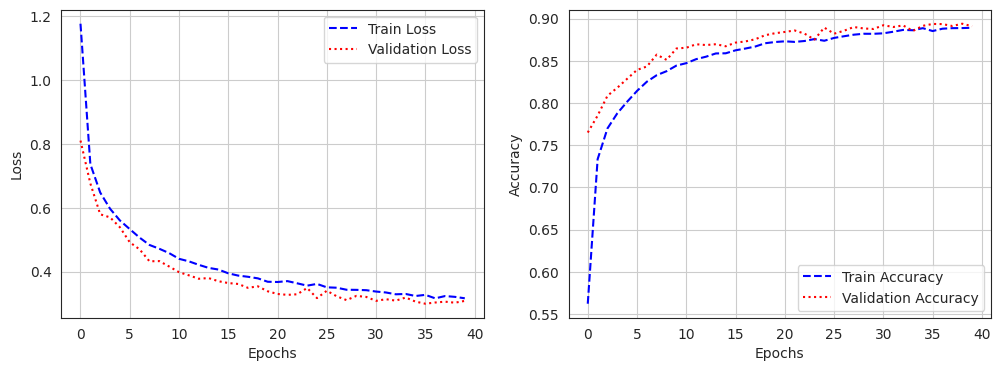

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_2.history['loss'], 'b--', label='Train Loss')
plt.plot(hist_2.history['val_loss'], 'r:', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(hist_2.history['accuracy'], 'b--', label='Train Accuracy')
plt.plot(hist_2.history['val_accuracy'], 'r:', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()


### 모델 평가

In [ ]:
test_loss, test_acc = model_2.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8826 - loss: 0.3393
테스트 정확도: 88.41%


### 2.3 모델 성능 높이기: 레이어 추가

### 모델 정의

In [ ]:
def build_model3():
    input = Input(shape=(28, 28, 1))
    x = Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')(input)
    x = BatchNormalization()(x)
    x = Conv2D(filters=64, kernel_size=3, activation='relu', padding='valid')(x)
    x = Dropout(0.5)(x)
    x = MaxPool2D(strides=(2,2))(x)

    x = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters=128, kernel_size=3, activation='relu', padding='valid')(x)
    x = Dropout(0.5)(x)
    x = MaxPool2D(strides=(2,2))(x)

    x = Conv2D(filters=256, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters=256, kernel_size=3, activation='relu', padding='valid')(x)
    x = Dropout(0.5)(x)
    x = MaxPool2D(strides=(2,2))(x)

    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input, outputs=output)

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model_3 = build_model3()
model_3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 11, 11, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 5, 5, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,3

 Total params: 1,411,530 (5.38 MB)

 Trainable params: 1,410,634 (5.38 MB)

 Non-trainable params: 896 (3.50 KB)

### 모델 학습

In [ ]:
hist_3 = model_3.fit(x_train, y_train,
                     epochs=20,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 25s 45ms/step - accuracy: 0.6175 - loss: 1.1249 - val_accuracy: 0.0971 - val_loss: 2.4271
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8289 - loss: 0.4857 - val_accuracy: 0.7427 - val_loss: 1.1000
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8594 - loss: 0.3963 - val_accuracy: 0.8140 - val_loss: 0.7152
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8799 - loss: 0.3384 - val_accuracy: 0.8038 - val_loss: 0.6488
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8890 - loss: 0.3105 - val_accuracy: 0.8477 - val_loss: 0.5700
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8971 - loss: 0.2911 - val_accuracy: 0.8329 - val_loss: 0.5949
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9012 - loss: 0.2835 - val_accuracy: 0.7814 - val_loss: 0.6564
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9075 - loss: 0.2659 - val_accuracy: 

### 학습 결과 시각화

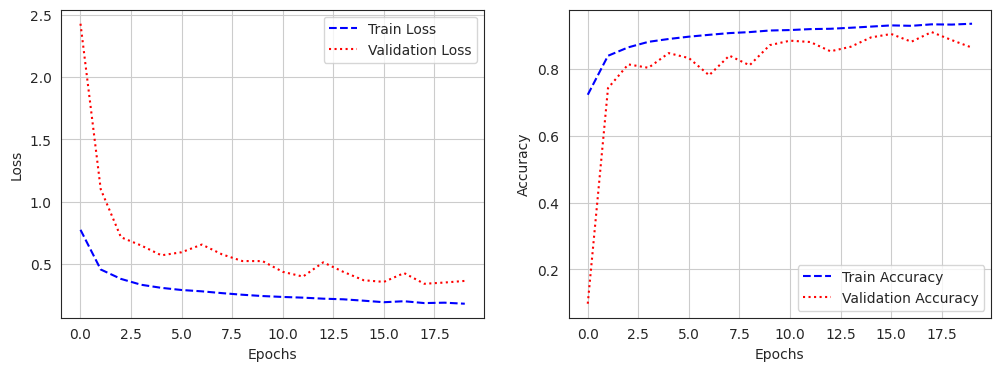

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_3.history['loss'], 'b--', label='Train Loss')
plt.plot(hist_3.history['val_loss'], 'r:', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(hist_3.history['accuracy'], 'b--', label='Train Accuracy')
plt.plot(hist_3.history['val_accuracy'], 'r:', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()


### 모델 평가

In [ ]:
test_loss, test_acc = model_3.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8564 - loss: 0.3797
테스트 정확도: 86.15%


### 2.4 모델 성능 높이기: 이미지 보강(Image Augmentation)

### 이미지 보강 설정

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    shear_range=0.6,
    width_shift_range=0.15,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

### 이미지 보강 예시 시각화

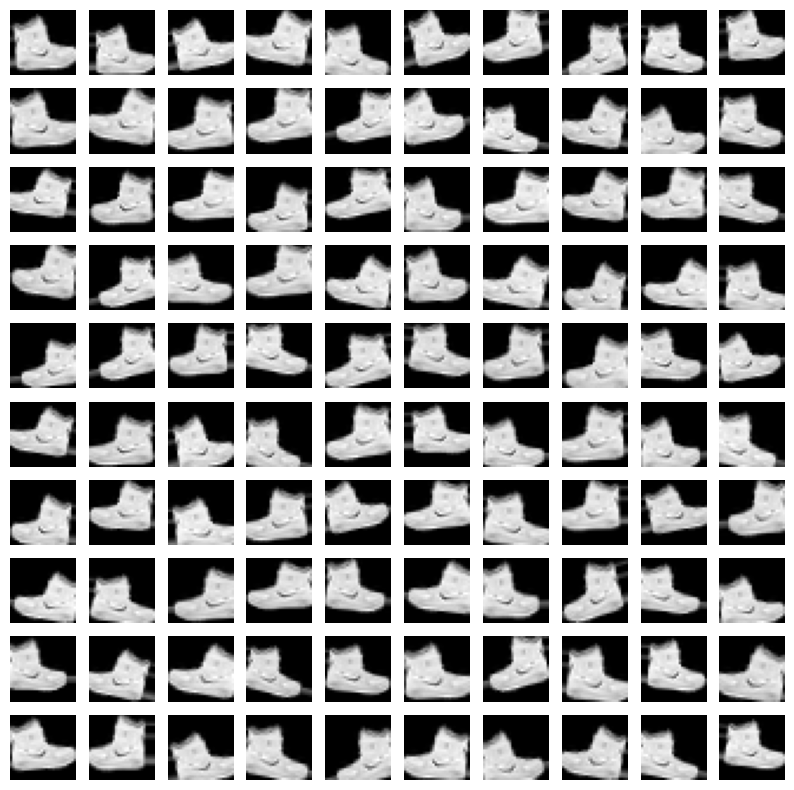

In [ ]:
augment_size = 200

# 첫 번째 이미지 복제
x_augmented_sample = np.tile(x_train[0], (augment_size, 1, 1, 1))

# 이미지 보강 적용
# Use next(iterator) instead of iterator.next()
x_augmented_sample = next(image_generator.flow(x_augmented_sample, batch_size=augment_size, shuffle=False))

# 보강된 이미지 시각화
plt.figure(figsize=(10, 10))

for i in range(1, 101):
    plt.subplot(10, 10, i)
    plt.axis('off')
    plt.imshow(x_augmented_sample[i-1].reshape(28, 28), cmap='gray')

plt.show()

### 데이터 보강 및 합치기

In [ ]:
# 코드 실행 오래 걸림.. -> But, Macbook M3Max에서는 2.2sec?? Why??

augment_size = 1024

# 랜덤하게 데이터 선택
random_indices = np.random.randint(x_train.shape[0], size=augment_size)
x_augmented = x_train[random_indices].copy()
y_augmented = y_train[random_indices].copy()

# 이미지 보강 적용
# Use next(iterator) instead of iterator.next()
x_augmented = next(image_generator.flow(x_augmented, batch_size=augment_size, shuffle=False))

# 원본 데이터와 보강된 데이터 합치기
x_train_augmented = np.concatenate((x_train, x_augmented))
y_train_augmented = np.concatenate((y_train, y_augmented))

print("보강된 훈련 데이터 셋:", x_train_augmented.shape, y_train_augmented.shape)

보강된 훈련 데이터 셋: (61024, 28, 28, 1) (61024,)


### 모델 학습

In [ ]:
model_4 = build_model3()
model_4.summary()

hist_4 = model_4.fit(x_train_augmented, y_train_augmented,
                     epochs=30,
                     validation_split=0.3,
                     batch_size=128)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 26, 26, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 13, 13, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 11, 11, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 5, 5, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,3

 Total params: 1,411,530 (5.38 MB)

 Trainable params: 1,410,634 (5.38 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.6045 - loss: 1.1660 - val_accuracy: 0.1632 - val_loss: 2.2730
Epoch 2/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8303 - loss: 0.4761 - val_accuracy: 0.4229 - val_loss: 1.4373
Epoch 3/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8706 - loss: 0.3767 - val_accuracy: 0.7989 - val_loss: 0.7466
Epoch 4/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8864 - loss: 0.3270 - val_accuracy: 0.7890 - val_loss: 0.7240
Epoch 5/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8916 - loss: 0.3095 - val_accuracy: 0.7099 - val_loss: 0.8088
Epoch 6/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8983 - loss: 0.2980 - val_accuracy: 0.8187 - val_loss: 0.6357
Epoch 7/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9039 - loss: 0.2770 - val_accuracy: 0.7656 - val_loss: 0.7193
Epoch 8/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9075 - loss: 0.2684 - val_accuracy: 

### 학습 결과 시각화

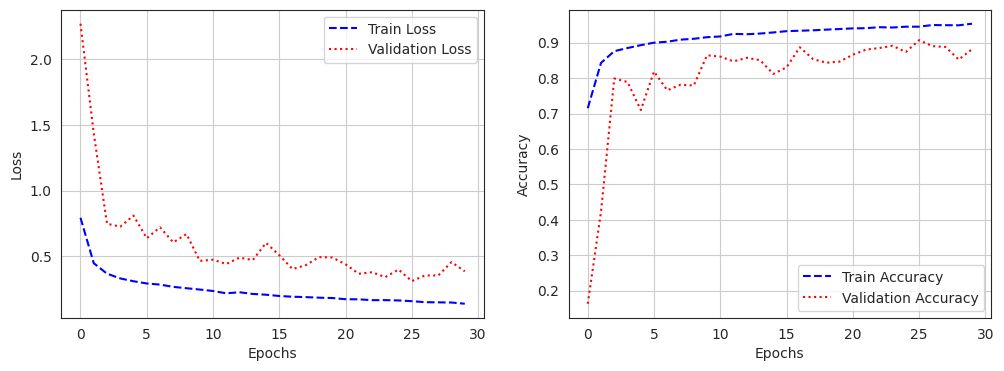

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_4.history['loss'], 'b--', label='Train Loss')
plt.plot(hist_4.history['val_loss'], 'r:', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(hist_4.history['accuracy'], 'b--', label='Train Accuracy')
plt.plot(hist_4.history['val_accuracy'], 'r:', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

### 모델 평가

In [ ]:
test_loss, test_acc = model_4.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8904 - loss: 0.3340
테스트 정확도: 89.33%


## 3. PyTorch를 사용한 모델 구현


### 필요한 라이브러리 import

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

### 데이터 로드 및 전처리


In [ ]:
# 데이터 변환기 정의
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 텐서로 변환
    transforms.Normalize((0.5,), (0.5,))  # 평균과 표준편차로 정규화
])

# Fashion MNIST 데이터셋 로드
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# 훈련 데이터셋을 훈련과 검증으로 분할
train_dataset, val_dataset = random_split(train_dataset, [50000, 10000])

# 데이터 로더 정의
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 클래스 이름 정의
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.9MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 274kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.02MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 8.30MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



### 데이터 시각화

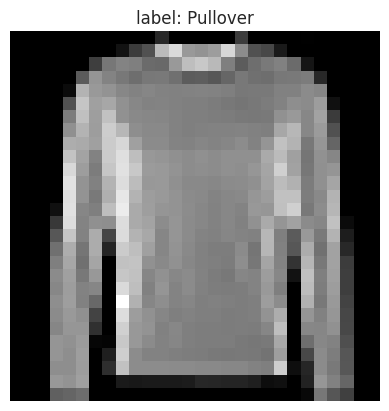

In [ ]:
# 첫 번째 훈련 이미지 시각화
images, labels = next(iter(train_loader))
plt.figure()
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title(f'label: {class_names[labels[0]]}')
plt.axis('off')
plt.show()

### 3.1 간단한 모델 구성 및 학습

### 모델 정의


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3),  # (28-3+1)=26
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3),  # (26-3+1)=24
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3),  # (24-3+1)=22
            nn.ReLU()
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*22*22, 128), # This layer expects input of 64*22*22
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = SimpleCNN()
print(model)

!pip install torchinfo
from torchinfo import summary
summary(model, input_size=(1, 1, 28, 28))

SimpleCNN(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=30976, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Linear(in_features=64, out_features=10, bias=True)
  )
)


Layer (type:depth-idx)                   Output Shape              Param #
SimpleCNN                                [1, 10]                   --
├─Sequential: 1-1                        [1, 64, 22, 22]           --
│    └─Conv2d: 2-1                       [1, 32, 26, 26]           320
│    └─ReLU: 2-2                         [1, 32, 26, 26]           --
│    └─Conv2d: 2-3                       [1, 64, 24, 24]           18,496
│    └─ReLU: 2-4                         [1, 64, 24, 24]           --
│    └─Conv2d: 2-5                       [1, 64, 22, 22]           36,928
│    └─ReLU: 2-6                         [1, 64, 22, 22]           --
├─Sequential: 1-2                        [1, 10]                   --
│    └─Flatten: 2-7                      [1, 30976]                --
│    └─Linear: 2-8                       [1, 128]                  3,965,056
│    └─ReLU: 2-9                         [1, 128]                  --
│    └─Linear: 2-10                      [1, 64]                   8,

### 모델 학습

In [ ]:
# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# 학습 설정
epochs = 20
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# device 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(1, epochs+1):
    # Train
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_losses.append(running_loss / len(train_loader.dataset))
    train_accuracies.append(100 * correct / total)

    # Eval
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            # Move images and labels to device
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(val_loader.dataset))
    val_accuracies.append(100 * correct / total)

    print(f"Epoch [{epoch}/{epochs}], "
          f"Train Loss: {train_losses[-1]:.4f}, "
          f"Val Loss: {val_losses[-1]:.4f}, "
          f"Train Acc: {train_accuracies[-1]:.2f}%, "
          f"Val Acc: {val_accuracies[-1]:.2f}%")

Epoch [1/20], Train Loss: 0.4813, Val Loss: 0.3464, Train Acc: 82.51%, Val Acc: 87.34%
Epoch [2/20], Train Loss: 0.2846, Val Loss: 0.2603, Train Acc: 89.55%, Val Acc: 90.49%
Epoch [3/20], Train Loss: 0.2231, Val Loss: 0.2422, Train Acc: 91.84%, Val Acc: 91.49%
Epoch [4/20], Train Loss: 0.1765, Val Loss: 0.2416, Train Acc: 93.50%, Val Acc: 91.74%
Epoch [5/20], Train Loss: 0.1402, Val Loss: 0.2457, Train Acc: 94.77%, Val Acc: 91.71%
Epoch [6/20], Train Loss: 0.1040, Val Loss: 0.2695, Train Acc: 96.17%, Val Acc: 91.78%
Epoch [7/20], Train Loss: 0.0731, Val Loss: 0.3023, Train Acc: 97.34%, Val Acc: 91.85%
Epoch [8/20], Train Loss: 0.0577, Val Loss: 0.3278, Train Acc: 97.87%, Val Acc: 92.15%
Epoch [9/20], Train Loss: 0.0417, Val Loss: 0.4044, Train Acc: 98.49%, Val Acc: 91.32%
Epoch [10/20], Train Loss: 0.0330, Val Loss: 0.4382, Train Acc: 98.80%, Val Acc: 91.52%
Epoch [11/20], Train Loss: 0.0260, Val Loss: 0.4417, Train Acc: 99.09%, Val Acc: 91.18%
Epoch [12/20], Train Loss: 0.0214, Val Lo

### 학습 결과 시각화

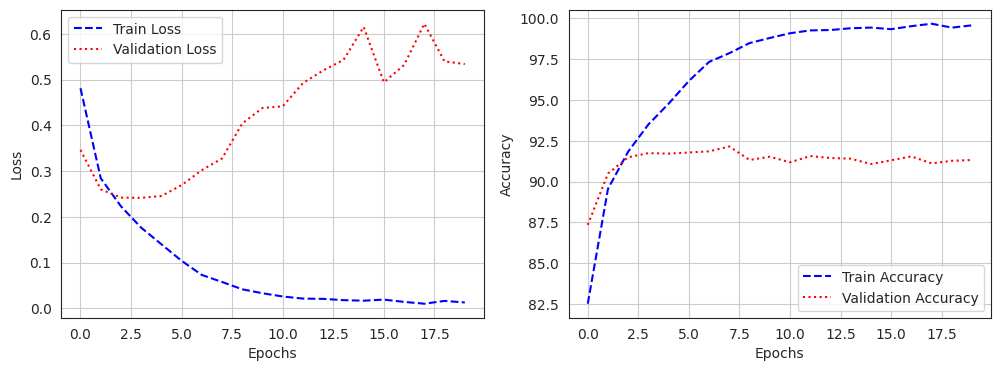

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, 'b--', label='Train Loss')
plt.plot(val_losses, 'r:', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, 'b--', label='Train Accuracy')
plt.plot(val_accuracies, 'r:', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

### 모델 평가

In [ ]:
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader.dataset)
test_accuracy = 100 * correct / total
print(f"테스트 정확도: {test_accuracy:.2f}%")

테스트 정확도: 90.90%


### 3.2 모델 구성 및 학습: 과대적합 방지

### 모델 정의

In [ ]:
import torch.nn.functional as F

class OverfitPreventionCNN(nn.Module):
    def __init__(self):
        super(OverfitPreventionCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3),  # (28-3+1)=26
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (26/2)=13
            nn.Conv2d(32, 64, kernel_size=3),  # (13-3+1)=11
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.MaxPool2d(kernel_size=2, stride=2),  # (11/2)=5
            nn.Conv2d(64, 64, kernel_size=3),  # (5-3+1)=3
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.MaxPool2d(kernel_size=2, stride=2)  # (3/2)=1
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 1 * 1, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = OverfitPreventionCNN()
print(model)

from torchinfo import summary
summary(model, input_size=(1, 1, 28, 28))

OverfitPreventionCNN(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (8): ReLU()
    (9): Dropout(p=0.4, inplace=False)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=64, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.5, inplace=False)
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)


Layer (type:depth-idx)                   Output Shape              Param #
OverfitPreventionCNN                     [1, 10]                   --
├─Sequential: 1-1                        [1, 64, 1, 1]             --
│    └─Conv2d: 2-1                       [1, 32, 26, 26]           320
│    └─ReLU: 2-2                         [1, 32, 26, 26]           --
│    └─MaxPool2d: 2-3                    [1, 32, 13, 13]           --
│    └─Conv2d: 2-4                       [1, 64, 11, 11]           18,496
│    └─ReLU: 2-5                         [1, 64, 11, 11]           --
│    └─Dropout: 2-6                      [1, 64, 11, 11]           --
│    └─MaxPool2d: 2-7                    [1, 64, 5, 5]             --
│    └─Conv2d: 2-8                       [1, 64, 3, 3]             36,928
│    └─ReLU: 2-9                         [1, 64, 3, 3]             --
│    └─Dropout: 2-10                     [1, 64, 3, 3]             --
│    └─MaxPool2d: 2-11                   [1, 64, 1, 1]             --
├─Sequ

- 과대적합 방지를 위해 드롭아웃(Dropout) 레이어를 추가하였습니다.
- MaxPool2d 레이어를 사용하여 특징 맵의 크기를 줄였습니다.
- 모델의 복잡도를 낮추고, 모델이 데이터에 과적합되는 것을 방지합니다.

### 모델 학습

In [ ]:
# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# 학습 설정
epochs = 30
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# device 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(1, epochs+1):
    # 학습 모드
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_losses.append(running_loss / len(train_loader.dataset))
    train_accuracies.append(100 * correct / total)


    # 검증 모드
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(val_loader.dataset))
    val_accuracies.append(100 * correct / total)

    print(f"Epoch [{epoch}/{epochs}], "
          f"Train Loss: {train_losses[-1]:.4f}, "
          f"Val Loss: {val_losses[-1]:.4f}, "
          f"Train Acc: {train_accuracies[-1]:.2f}%, "
          f"Val Acc: {val_accuracies[-1]:.2f}%")

Epoch [1/30], Train Loss: 1.0739, Val Loss: 0.8048, Train Acc: 59.40%, Val Acc: 75.79%
Epoch [2/30], Train Loss: 0.7030, Val Loss: 0.6744, Train Acc: 75.03%, Val Acc: 78.49%
Epoch [3/30], Train Loss: 0.6157, Val Loss: 0.6083, Train Acc: 78.23%, Val Acc: 82.10%
Epoch [4/30], Train Loss: 0.5688, Val Loss: 0.5215, Train Acc: 80.06%, Val Acc: 82.90%
Epoch [5/30], Train Loss: 0.5321, Val Loss: 0.5070, Train Acc: 81.50%, Val Acc: 84.71%
Epoch [6/30], Train Loss: 0.5050, Val Loss: 0.4864, Train Acc: 82.30%, Val Acc: 84.70%
Epoch [7/30], Train Loss: 0.4880, Val Loss: 0.4577, Train Acc: 82.93%, Val Acc: 86.22%
Epoch [8/30], Train Loss: 0.4651, Val Loss: 0.4329, Train Acc: 83.95%, Val Acc: 86.17%
Epoch [9/30], Train Loss: 0.4519, Val Loss: 0.4263, Train Acc: 84.50%, Val Acc: 86.68%
Epoch [10/30], Train Loss: 0.4394, Val Loss: 0.3924, Train Acc: 85.02%, Val Acc: 87.25%
Epoch [11/30], Train Loss: 0.4265, Val Loss: 0.3699, Train Acc: 85.42%, Val Acc: 87.65%
Epoch [12/30], Train Loss: 0.4193, Val Lo

### 모델 평가

### 3.3 모델 성능 높이기: 레이어 추가

### 모델 정의

In [ ]:
class DeeperCNN(nn.Module):
    def __init__(self):
        super(DeeperCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),  # padding=1 for 'same' padding
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, kernel_size=3),  # default padding=0
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, kernel_size=3),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 256, kernel_size=3),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 1 * 1, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = DeeperCNN()
print(model)

from torchinfo import summary
summary(model, input_size=(1,1,28,28))

DeeperCNN(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (11): ReLU()
    (12): Dropout(p=0.5, inplace=False)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (17): Conv

Layer (type:depth-idx)                   Output Shape              Param #
DeeperCNN                                [1, 10]                   --
├─Sequential: 1-1                        [1, 256, 1, 1]            --
│    └─Conv2d: 2-1                       [1, 64, 28, 28]           640
│    └─ReLU: 2-2                         [1, 64, 28, 28]           --
│    └─BatchNorm2d: 2-3                  [1, 64, 28, 28]           128
│    └─Conv2d: 2-4                       [1, 64, 26, 26]           36,928
│    └─ReLU: 2-5                         [1, 64, 26, 26]           --
│    └─Dropout: 2-6                      [1, 64, 26, 26]           --
│    └─MaxPool2d: 2-7                    [1, 64, 13, 13]           --
│    └─Conv2d: 2-8                       [1, 128, 13, 13]          73,856
│    └─ReLU: 2-9                         [1, 128, 13, 13]          --
│    └─BatchNorm2d: 2-10                 [1, 128, 13, 13]          256
│    └─Conv2d: 2-11                      [1, 128, 11, 11]          147,584

- 레이어를 추가하여 모델의 깊이를 늘렸습니다.
- Batch Normalization을 사용하여 학습 속도와 안정성을 향상시켰습니다.
- 드롭아웃을 사용하여 과대적합을 방지했습니다.
- 마지막 특징 맵의 크기가 1x1이 되도록 설계하여 Fully Connected 레이어에 입력합니다.

### 모델 학습


In [ ]:
# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# 학습 설정
epochs = 20
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# device 설정
if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)
else:
    device = torch.device("cpu")

for epoch in range(1, epochs+1):
    # 훈련 모드
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_losses.append(running_loss / len(train_loader.dataset))
    train_accuracies.append(100 * correct / total)

    # 검증 모드
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(val_loader.dataset))
    val_accuracies.append(100 * correct / total)

    print(f"Epoch [{epoch}/{epochs}], "
          f"Train Loss: {train_losses[-1]:.4f}, "
          f"Val Loss: {val_losses[-1]:.4f}, "
          f"Train Acc: {train_accuracies[-1]:.2f}%, "
          f"Val Acc: {val_accuracies[-1]:.2f}%")

Epoch [1/20], Train Loss: 0.3669, Val Loss: 0.7250, Train Acc: 87.17%, Val Acc: 82.06%
Epoch [2/20], Train Loss: 0.3194, Val Loss: 0.7051, Train Acc: 88.89%, Val Acc: 85.57%
Epoch [3/20], Train Loss: 0.2893, Val Loss: 0.5865, Train Acc: 89.96%, Val Acc: 82.60%
Epoch [4/20], Train Loss: 0.2670, Val Loss: 0.4438, Train Acc: 90.62%, Val Acc: 90.05%
Epoch [5/20], Train Loss: 0.2510, Val Loss: 0.4246, Train Acc: 91.32%, Val Acc: 89.53%
Epoch [6/20], Train Loss: 0.2423, Val Loss: 0.3933, Train Acc: 91.73%, Val Acc: 90.66%
Epoch [7/20], Train Loss: 0.2285, Val Loss: 0.4509, Train Acc: 92.02%, Val Acc: 84.99%
Epoch [8/20], Train Loss: 0.2210, Val Loss: 0.3981, Train Acc: 92.40%, Val Acc: 88.89%
Epoch [9/20], Train Loss: 0.2113, Val Loss: 0.3394, Train Acc: 92.73%, Val Acc: 90.86%
Epoch [10/20], Train Loss: 0.1950, Val Loss: 0.3244, Train Acc: 93.20%, Val Acc: 89.59%
Epoch [11/20], Train Loss: 0.1920, Val Loss: 0.3133, Train Acc: 93.33%, Val Acc: 89.84%
Epoch [12/20], Train Loss: 0.1831, Val Lo

### 학습 결과 시각화

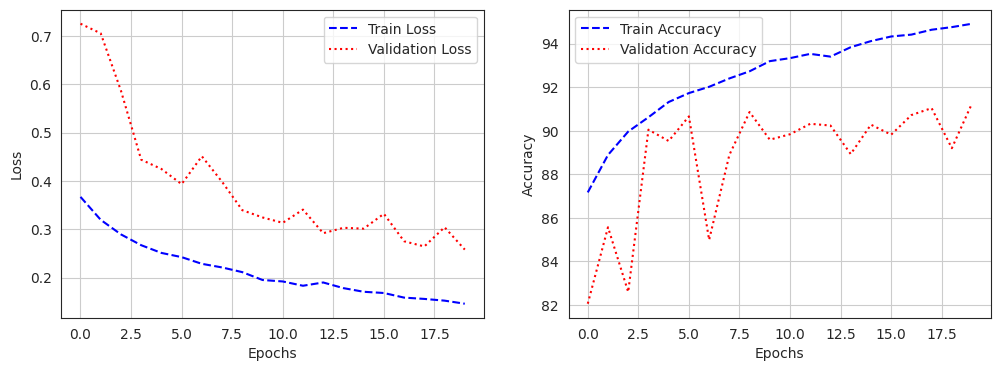

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, 'b--', label='Train Loss')
plt.plot(val_losses, 'r:', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, 'b--', label='Train Accuracy')
plt.plot(val_accuracies, 'r:', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

### 모델 평가

In [ ]:
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader.dataset)
test_accuracy = 100 * correct / total
print(f"테스트 정확도: {test_accuracy:.2f}%")

테스트 정확도: 91.18%


### 3.4 모델 성능 높이기: 이미지 보강(Image Augmentation)

### 이미지 보강 설정


In [ ]:
from torchvision.transforms import RandomRotation, RandomResizedCrop, RandomHorizontalFlip, ColorJitter

# 이미지 보강을 위한 데이터 변환기 정의
train_transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(28, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 기존의 검증 및 테스트 데이터 변환기는 그대로 사용
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

### 데이터셋 및 데이터 로더 재정의

In [ ]:
# 데이터셋 로드 (이미지 보강 적용)
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=train_transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=test_transform)

# 훈련 데이터셋을 훈련과 검증으로 분할
train_dataset, val_dataset = random_split(train_dataset, [50000, 10000])

# 데이터 로더 정의
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### 이미지 보강 예시 시각화

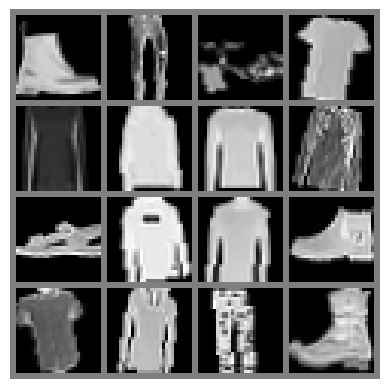

In [ ]:
# 이미지 보강된 샘플 시각화
dataiter = iter(train_loader)
images, labels = next(dataiter)
# 이미지 정규화를 역으로 변환하여 시각화
def imshow(img):
    img = img / 2 + 0.5  # 정규화 역변환
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# 첫 번째 배치의 이미지 시각화
imshow(torchvision.utils.make_grid(images[:16], nrow=4))

### 모델 학습

이미 앞서 정의한 DeeperCNN 모델을 사용하여 학습합니다.

In [ ]:
model = DeeperCNN()
optimizer = optim.Adam(model.parameters())

# device 설정
if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)
else:
    device = torch.device("cpu")

# 학습 설정
epochs = 30
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(1, epochs+1):
    # 훈련 모드
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_losses.append(running_loss / len(train_loader.dataset))
    train_accuracies.append(100 * correct / total)

    # 검증 모드
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(val_loader.dataset))
    val_accuracies.append(100 * correct / total)

    print(f"Epoch [{epoch}/{epochs}], "
          f"Train Loss: {train_losses[-1]:.4f}, "
          f"Val Loss: {val_losses[-1]:.4f}, "
          f"Train Acc: {train_accuracies[-1]:.2f}%, "
          f"Val Acc: {val_accuracies[-1]:.2f}%")


Epoch [1/30], Train Loss: 0.7430, Val Loss: 1.4088, Train Acc: 71.98%, Val Acc: 43.79%
Epoch [2/30], Train Loss: 0.5248, Val Loss: 1.1835, Train Acc: 81.11%, Val Acc: 56.48%
Epoch [3/30], Train Loss: 0.4493, Val Loss: 1.1285, Train Acc: 84.22%, Val Acc: 59.67%
Epoch [4/30], Train Loss: 0.4211, Val Loss: 1.1196, Train Acc: 85.09%, Val Acc: 63.18%
Epoch [5/30], Train Loss: 0.4066, Val Loss: 1.0351, Train Acc: 85.83%, Val Acc: 67.86%
Epoch [6/30], Train Loss: 0.3834, Val Loss: 0.7610, Train Acc: 86.40%, Val Acc: 80.88%
Epoch [7/30], Train Loss: 0.3733, Val Loss: 0.7937, Train Acc: 86.79%, Val Acc: 77.72%
Epoch [8/30], Train Loss: 0.3639, Val Loss: 0.9128, Train Acc: 87.10%, Val Acc: 74.56%
Epoch [9/30], Train Loss: 0.3575, Val Loss: 1.1785, Train Acc: 87.76%, Val Acc: 60.38%
Epoch [10/30], Train Loss: 0.3546, Val Loss: 0.7278, Train Acc: 87.68%, Val Acc: 80.62%
Epoch [11/30], Train Loss: 0.3475, Val Loss: 0.5290, Train Acc: 87.76%, Val Acc: 83.55%
Epoch [12/30], Train Loss: 0.3386, Val Lo

### 학습 결과 시각화

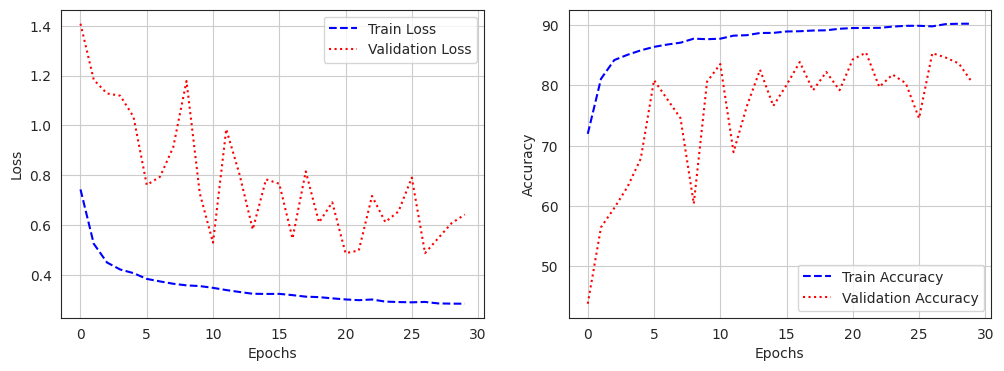

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, 'b--', label='Train Loss')
plt.plot(val_losses, 'r:', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, 'b--', label='Train Accuracy')
plt.plot(val_accuracies, 'r:', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

### 모델 평가


In [ ]:
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_loader.dataset)
test_accuracy = 100 * correct / total
print(f"테스트 정확도: {test_accuracy:.2f}%")

테스트 정확도: 82.42%


## 4. TensorFlow와 PyTorch 구현 비교

- 모델 구조: 두 프레임워크에서 모델의 구조는 거의 동일하게 구현되었습니다.

- 과대적합 방지
    - 드롭아웃과 배치 정규화를 모두 사용하였습니다.
- 레이어 추가
    - 모델의 깊이를 늘려 성능을 향상시켰습니다.
- 이미지 보강
    - 데이터 증강 기법을 사용하여 모델의 일반화 성능을 높였습니다.

- 코드 차이점

    - TensorFlow는 fit 메서드를 사용하여 학습을 진행하였고, ImageDataGenerator를 사용하여 이미지 보강을 적용하였습니다.
    - PyTorch는 학습 루프를 직접 작성하였고, torchvision.transforms를 사용하여 이미지 보강을 적용하였습니다.

- 성능 비교

    - 두 프레임워크 모두에서 모델의 성능이 향상되었으며, 비슷한 수준의 정확도를 달성하였습니다.
    - 실제 성능은 하이퍼파라미터 설정, 초기화, 데이터셋 분할 등에 따라 약간의 차이가 있을 수 있습니다.


## 5. 결론

- TensorFlow와 PyTorch를 사용하여 Fashion MNIST 데이터셋에 대한 분류 모델을 구현하였고, 다양한 기법을 적용하여 모델의 성능을 향상시켰습니다.
- 과대적합 방지, 레이어 추가, 이미지 보강 등의 방법을 통해 모델의 일반화 능력을 높일 수 있음을 확인하였습니다.
- 두 프레임워크의 코드 구조와 사용법을 비교함으로써 각각의 장단점을 이해할 수 있었습니다.
    - TensorFlow는 고수준의 API를 제공하여 간결한 코드 작성을 지원합니다.
    - PyTorch는 세밀한 제어가 가능하며, 연구 및 실험에 유용합니다.
- 실제 프로젝트에서는 팀의 선호도, 기존 코드베이스, 요구사항에 따라 적절한 프레임워크를 선택하여 사용할 수 있습니다.

## 6. 과제

- 현재 테스트 정확도 중 최고 정확도는 91.18% 입니다.
- 어제 여러분들이 확인 했었던 여러 하이퍼파라미터들을 수정해보시면서 모델에 대한 성능을 개선 시켜 보세요.
- 그리고 해당 기록을 노션 페이지에 업로드 해주세요.

### Reference

- [TensorFlow 공식 문서](https://www.tensorflow.org/?hl=ko)
- [PyTorch 공식 문서](https://pytorch.org/)
- [Fashion MNIST 데이터셋](https://github.com/zalandoresearch/fashion-mnist)